In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches

import missingno as msno

import scipy
from scipy import stats
from scipy.stats import shapiro, kstest, normaltest

In [2]:
#read the dataframe
df = pd.read_csv(r'C:\Users\user\Documents\database purwadhika\capston_project 2\data\processed\cleaned_data.csv')
df.sample(5)

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,discretizatingAge,discretizatingIncome
1358,9140,1960,2n Cycle,63,Together,50523.0,1,1,2013-12-25,89,...,6,0,0,0,0,0,0,0,Late middle-aged adults,$34948.5 - $67793.5
36,8595,1973,Graduation,50,Widow,42429.0,0,1,2014-02-11,99,...,5,0,0,0,0,0,0,0,Late middle-aged adults,$34948.5 - $67793.5
1391,8783,1950,Graduation,73,Married,57045.0,0,1,2012-09-08,40,...,3,0,0,0,0,0,0,0,Older Adults,$34948.5 - $67793.5
561,7369,1981,Master,42,Married,36959.0,1,0,2013-10-02,56,...,8,0,0,0,0,0,0,0,Early middle-aged adults,$34948.5 - $67793.5
226,9449,1958,PhD,65,Single,79761.0,0,1,2013-10-04,32,...,3,0,0,0,0,0,0,0,Older Adults,> $67793.5


interval columns not set, guessing: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']


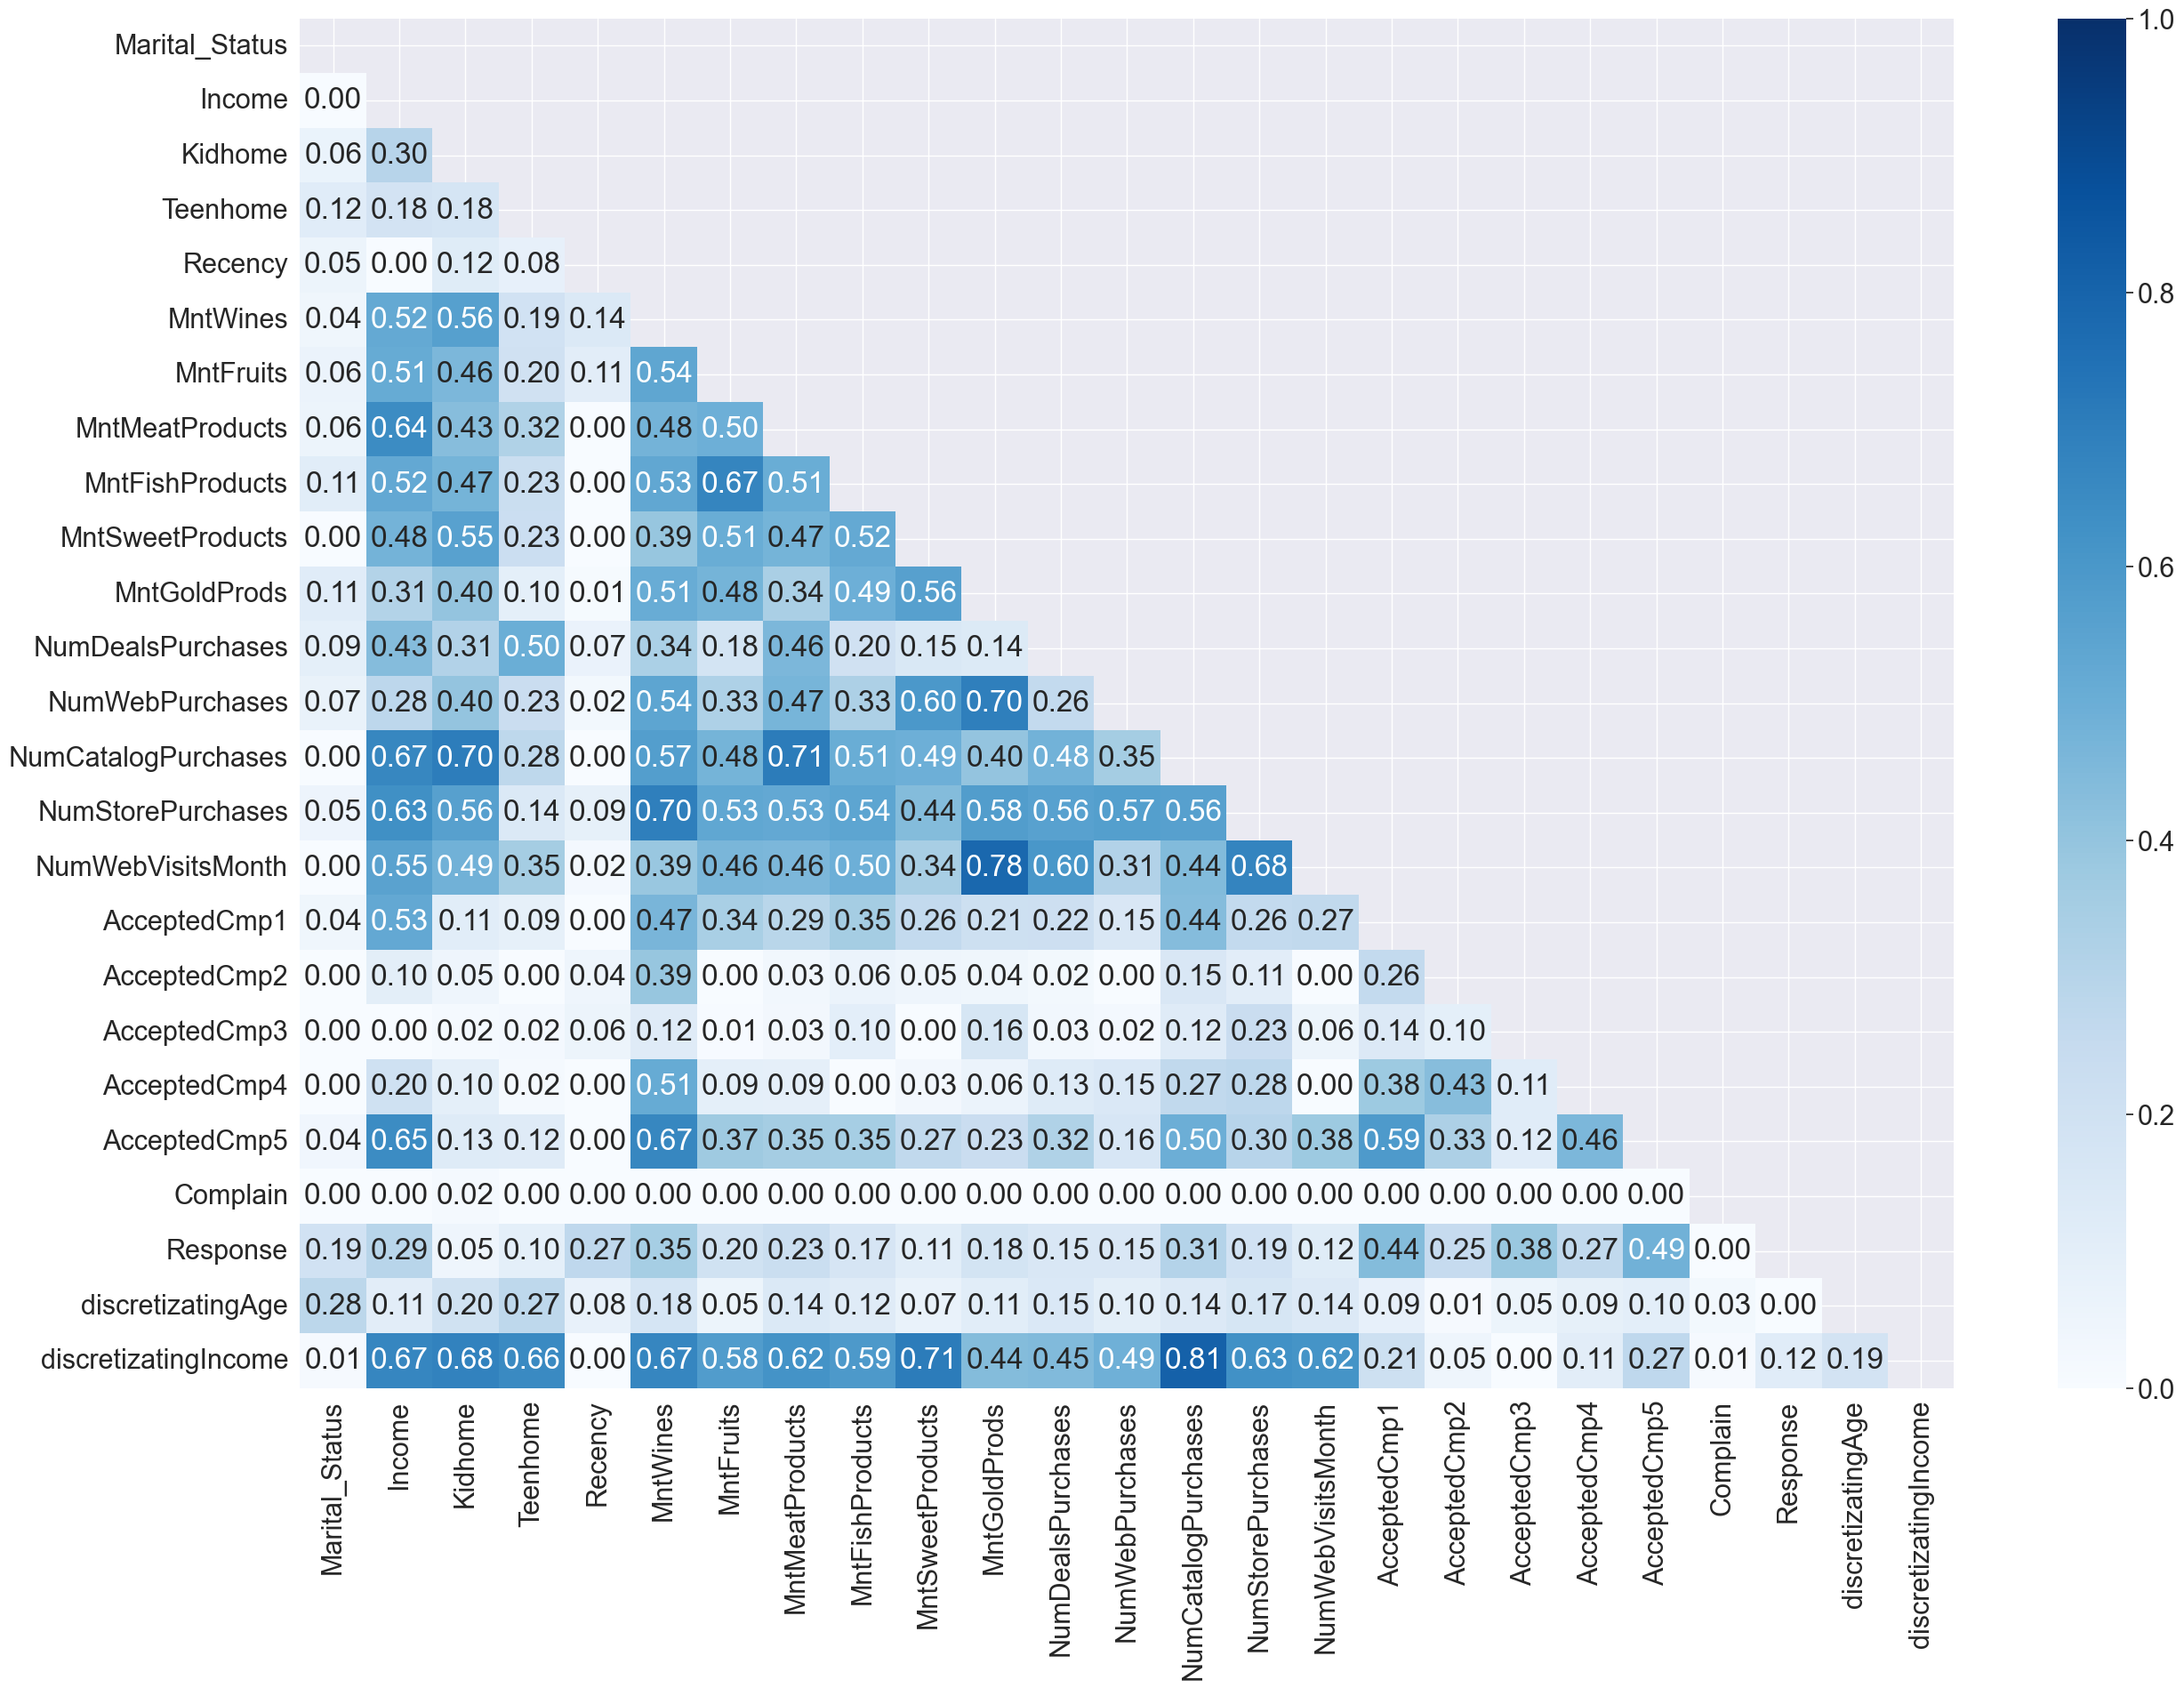

interval columns not set, guessing: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']


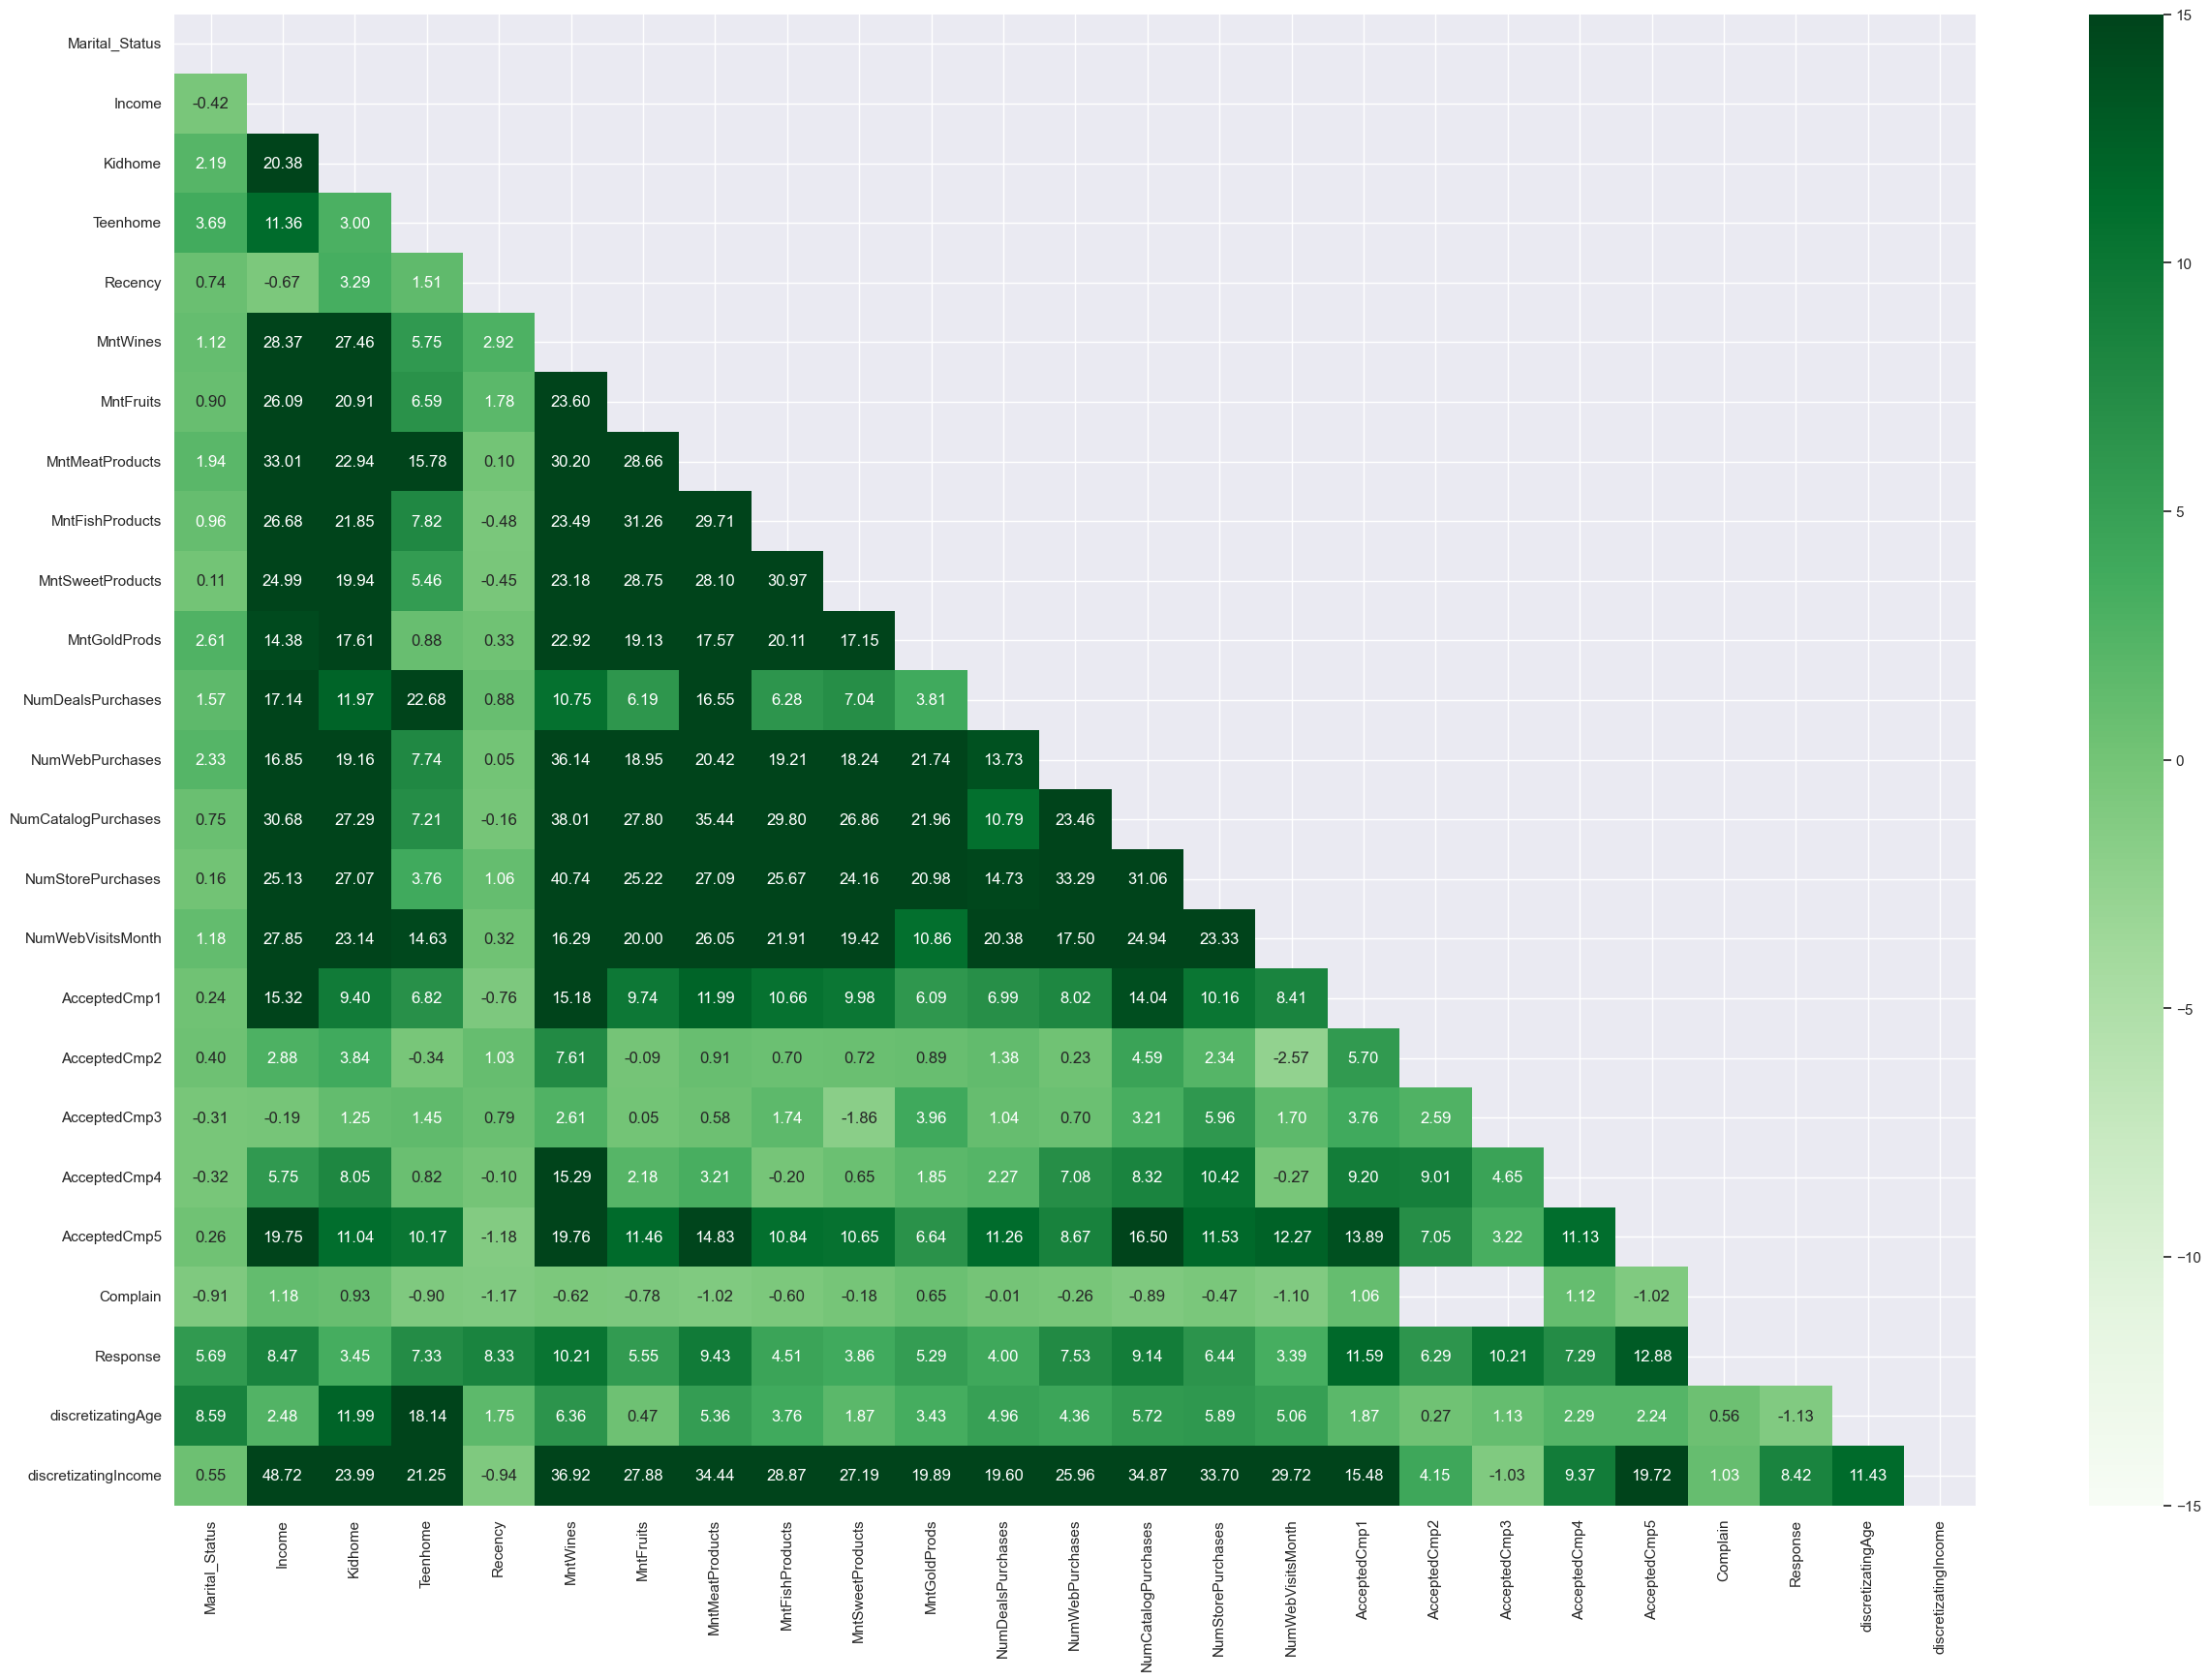

<Figure size 640x480 with 0 Axes>

In [11]:
dftest = df[['Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'discretizatingAge', 'discretizatingIncome']]
# heatmap of variable correlation 
fig, ax = plt.subplots(num= 15, figsize=(30, 20))
phik_overview = dftest.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview, mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
sns.set(font_scale=1)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(num= 15, figsize=(30, 20))
significance_overview = dftest.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f')
sns.set(font_scale=1)
plt.show()


plt.tight_layout()


In [4]:
# df[df['NumWebPurchases']].groupby(['discretizatingIncome']).agg('count')
dftest = df[['NumWebVisitsMonth', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'discretizatingAge', '']]

table = pd.pivot_table(dftest, index=['discretizatingAge', 'discretizatingIncome'],
                       columns=['NumWebPurchases'], aggfunc=np.sum)
table

KeyError: "[''] not in index"

In [ ]:
df['MntWines']

0       635
1        11
2       426
3        11
4       173
       ... 
2235     71
2236    161
2237    264
2238    532
2239     32
Name: MntWines, Length: 2240, dtype: int64

In [ ]:
a = pd.crosstab(df.discretizatingAge, df.discretizatingIncome)
a


discretizatingIncome,$0 - $34948.5,$34948.5 - $67793.5,> $67793.5
discretizatingAge,,,
Among young,40,18,33
Early middle-aged adults,265,321,170
Late middle-aged adults,188,476,210
Older Adults,54,305,160


In [ ]:
def ExpectatedVals(a, x, y):
    sumRows = a[x].values.sum()
    sumCols = a.loc[y].values.sum()
    
    return sumRows, sumCols
    

In [ ]:
df

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,discretizatingAge,discretizatingIncome
0,5524,1957,Graduation,66,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,1,Older Adults,$34948.5 - $67793.5
1,2174,1954,Graduation,69,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,0,Older Adults,$34948.5 - $67793.5
2,4141,1965,Graduation,58,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,0,Late middle-aged adults,> $67793.5
3,6182,1984,Graduation,39,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,0,Early middle-aged adults,$0 - $34948.5
4,5324,1981,PhD,42,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,0,Early middle-aged adults,$34948.5 - $67793.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5079,1971,Graduation,52,Married,42075.5,1,1,2013-03-03,82,...,8,0,0,0,0,0,0,0,Late middle-aged adults,$34948.5 - $67793.5
2236,10339,1954,Master,69,Together,52884.5,0,1,2013-06-23,83,...,6,0,0,0,0,0,0,0,Older Adults,$34948.5 - $67793.5
2237,3117,1955,Graduation,68,Single,59925.0,0,1,2013-10-18,95,...,7,0,0,0,0,0,0,0,Older Adults,$34948.5 - $67793.5
2238,5250,1943,Master,80,Widow,71335.5,0,0,2013-10-30,75,...,1,0,0,1,0,0,0,1,Older Adults,> $67793.5


In [ ]:
df.loc[(df.discretizatingIncome == '$0 - $34948.5') & (df.discretizatingAge == 'Among young')]

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,discretizatingAge,discretizatingIncome
28,6864,1989,Master,34,Divorced,10979.0,0,0,2014-05-22,34,...,5,0,0,0,0,0,0,0,Among young,$0 - $34948.5
43,9909,1996,2n Cycle,27,Married,7500.0,0,0,2012-11-09,24,...,9,0,0,0,0,0,0,1,Among young,$0 - $34948.5
318,663,1989,PhD,34,Single,33996.0,0,0,2013-09-11,46,...,4,0,0,0,0,0,0,0,Among young,$0 - $34948.5
364,4459,1989,Graduation,34,Single,30279.0,1,0,2012-12-30,13,...,8,0,0,0,0,0,0,0,Among young,$0 - $34948.5
415,5987,1989,2n Cycle,34,Together,10404.0,1,0,2014-05-04,52,...,5,0,0,0,0,0,0,0,Among young,$0 - $34948.5
427,5012,1989,Graduation,34,Married,28691.0,1,0,2013-07-04,56,...,8,0,0,0,0,0,0,0,Among young,$0 - $34948.5
430,10642,1989,Graduation,34,Single,30279.0,1,0,2012-12-30,13,...,8,0,0,0,0,0,0,0,Among young,$0 - $34948.5
489,8151,1990,Basic,33,Married,24279.0,0,0,2012-12-29,6,...,8,0,0,0,0,0,0,0,Among young,$0 - $34948.5
495,3386,1992,Graduation,31,Married,34935.0,0,0,2013-06-21,71,...,7,0,0,0,0,0,0,0,Among young,$0 - $34948.5
504,10203,1990,Graduation,33,Single,26095.0,1,0,2013-06-30,77,...,7,0,0,0,0,0,0,0,Among young,$0 - $34948.5


In [ ]:
40/2240

0.017857142857142856

In [ ]:
y = a['$0 - $34948.5'].values.sum()
y

547

In [ ]:
a.loc['Among young'].values.sum()

91

In [ ]:
probx = (40/a.loc['Among young'].values.sum())*(40/a['$0 - $34948.5'].values.sum())
probx*2240

72.0011250175784

In [ ]:
Pa = (a.loc['Among young'].values.sum()/len(df))
Pb = (a['$0 - $34948.5'].values.sum()/len(df))
# peluang Among young berpenghasilan 0-34948.5
prob1 = Pa*(Pb*Pa/Pa)
prob1

# peluang Among young berpenghasilan $34948.5 - $67793.5
# prob2 = (a.loc['Among young'].values.sum()/len(df))*(a['$0 - $34948.5'].values.sum()/len(df))
# prob2

0.009920479910714286

In [ ]:
pd.set_option('display.max_rows', 500)
table = pd.pivot_table(dftest, index=['discretizatingAge', 'discretizatingIncome', 'Marital_Status'], values= 'MntWines',
                       aggfunc='sum').sort_values(by= 'MntWines', ascending = False)
table

MntWines
discretizatingAge        discretizatingIncome Marital_Status          
Late middle-aged adults  > $67793.5           Married            49779
                         $34948.5 - $67793.5  Married            48071
Early middle-aged adults > $67793.5           Married            44311
Late middle-aged adults  > $67793.5           Together           39577
Older Adults             > $67793.5           Married            38372
                         $34948.5 - $67793.5  Married            35662
Early middle-aged adults $34948.5 - $67793.5  Married            34149
Late middle-aged adults  $34948.5 - $67793.5  Together           32615
Older Adults             > $67793.5           Together           27639
Early middle-aged adults > $67793.5           Single             25996
                                              Together           25477
Late middle-aged adults  $34948.5 - $67793.5  Single             25267
Older Adults             $34948.5 - $67793.5  Together           25010
Late middle-aged adults  > $67793.5           Single             22065
                         $34948.5 - $67793.5  Divorced           22043
Older Adults             > $67793.5           Single             20112
Late middle-aged adults  > $67793.5           Divorced           17991
Early middle-aged adults $34948.5 - $67793.5  Together           17208
Older Adults             $34948.5 - $67793.5  Single             15554
Early middle-aged adults $34948.5 - $67793.5  Single             12234
Among young              > $67793.5           Single             11594
Early middle-aged adults > $67793.5           Divorced           11174
Older Adults             $34948.5 - $67793.5  Divorced            9411
                         > $67793.5           Widow               8474
                                              Divorced            8266
Late middle-aged adults  $34948.5 - $67793.5  Widow               7417
Older Adults             $34948.5 - $67793.5  Widow               6589
Early middle-aged adults $34948.5 - $67793.5  Divorced            5815
Among young              > $67793.5           Together            5745
Late middle-aged adults  > $67793.5           Widow               4561
Among young              > $67793.5           Married             3018
                         $34948.5 - $67793.5  Single              2585
Early middle-aged adults $0 - $34948.5        Married             2015
Late middle-aged adults  $0 - $34948.5        Together            1863
                                              Married             1487
Early middle-aged adults $0 - $34948.5        Single              1466
Late middle-aged adults  $0 - $34948.5        Single              1128
Among young              $34948.5 - $67793.5  Together            1104
                         $0 - $34948.5        Married             1084
Early middle-aged adults $34948.5 - $67793.5  Widow               1057
                         $0 - $34948.5        Together             991
Older Adults             $0 - $34948.5        Together             687
Late middle-aged adults  $34948.5 - $67793.5  YOLO                 644
Among young              $34948.5 - $67793.5  Married              613
Older Adults             $34948.5 - $67793.5  Alone                534
Among young              > $67793.5           Absurd               471
Early middle-aged adults $0 - $34948.5        Divorced             290
Among young              $0 - $34948.5        Single               283
Late middle-aged adults  $0 - $34948.5        Divorced             273
Older Adults             $34948.5 - $67793.5  Absurd               240
                         $0 - $34948.5        Married              190
Late middle-aged adults  $0 - $34948.5        Widow                188
Older Adults             $0 - $34948.5        Widow                148
                                              Single               115
                                              Divorced              85
Among young    

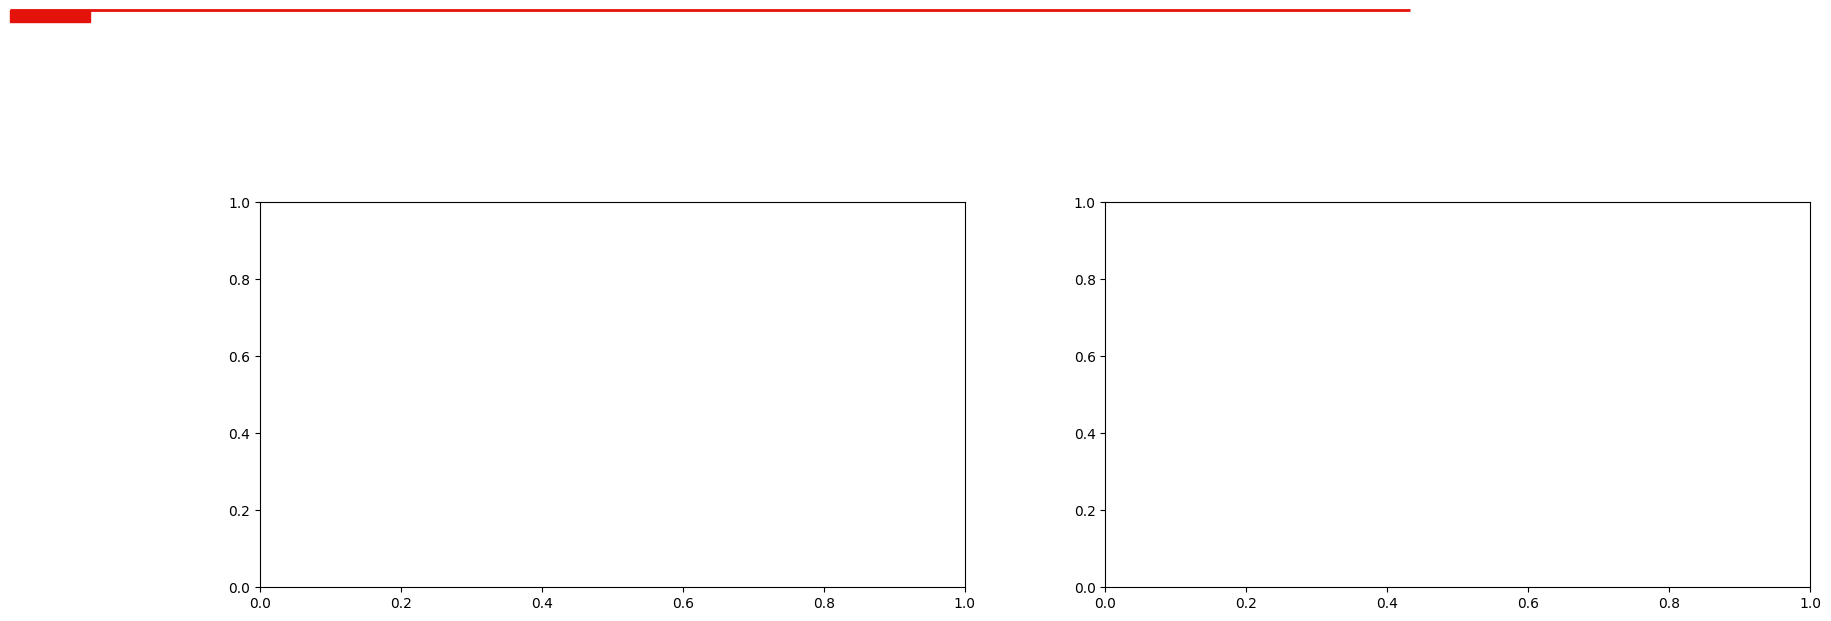

In [ ]:
# Inisialisasi parameter gambar
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))